In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import io

In [19]:
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

rm: cannot remove '/content/ColourIris.png': No such file or directory
--2021-02-15 23:22:23--  https://i.pinimg.com/originals/70/47/57/704757a5b10b8ca080f464dc4404e0cf.jpg
Resolving i.pinimg.com (i.pinimg.com)... 199.232.128.84, 2a04:4e42:46::84
Connecting to i.pinimg.com (i.pinimg.com)|199.232.128.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 296795 (290K) [image/jpeg]
Saving to: ‘704757a5b10b8ca080f464dc4404e0cf.jpg.1’

704757a5b10b8ca080f 100%[===================>] 289.84K  --.-KB/s    in 0.05s   

2021-02-15 23:22:23 (6.02 MB/s) - ‘704757a5b10b8ca080f464dc4404e0cf.jpg.1’ saved [296795/296795]



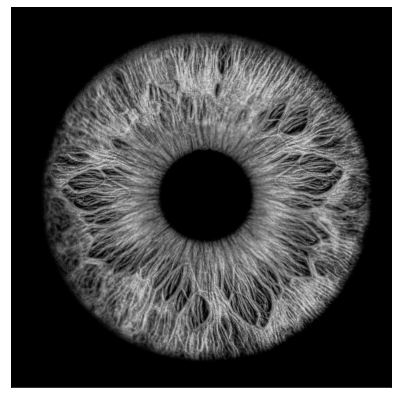

(1200, 1200)

In [64]:
!rm /content/ColourIris.png
!wget https://i.pinimg.com/originals/70/47/57/704757a5b10b8ca080f464dc4404e0cf.jpg
img = plt.imread('/content/704757a5b10b8ca080f464dc4404e0cf.jpg')
img = rgb2gray(img)

imshow(img)
img.shape

### Inicialización del algoritmo

In [65]:
s = np.linspace(0, 2*np.pi, 400)
offset = img.shape[0] / 2
x = offset + offset*np.cos(s)
y = offset + offset*np.sin(s)
init = np.array([x, y]).T
init

array([[1.20000000e+03, 6.00000000e+02],
       [1.19992561e+03, 6.09448008e+02],
       [1.19970245e+03, 6.18893674e+02],
       [1.19933058e+03, 6.28334655e+02],
       [1.19881010e+03, 6.37768609e+02],
       [1.19814112e+03, 6.47193197e+02],
       [1.19732382e+03, 6.56606083e+02],
       [1.19635841e+03, 6.66004933e+02],
       [1.19524511e+03, 6.75387414e+02],
       [1.19398420e+03, 6.84751202e+02],
       [1.19257601e+03, 6.94093974e+02],
       [1.19102087e+03, 7.03413412e+02],
       [1.18931917e+03, 7.12707207e+02],
       [1.18747134e+03, 7.21973054e+02],
       [1.18547783e+03, 7.31208655e+02],
       [1.18333914e+03, 7.40411719e+02],
       [1.18105579e+03, 7.49579965e+02],
       [1.17862836e+03, 7.58711119e+02],
       [1.17605745e+03, 7.67802917e+02],
       [1.17334368e+03, 7.76853105e+02],
       [1.17048775e+03, 7.85859437e+02],
       [1.16749035e+03, 7.94819682e+02],
       [1.16435222e+03, 8.03731616e+02],
       [1.16107415e+03, 8.12593030e+02],
       [1.157656

### Filtro gaussiano
Lo utilizamos para eliminar detalles y que el algoritmo no tenga problemas con detalles no relevantes como la textura, las pestañas, etc.

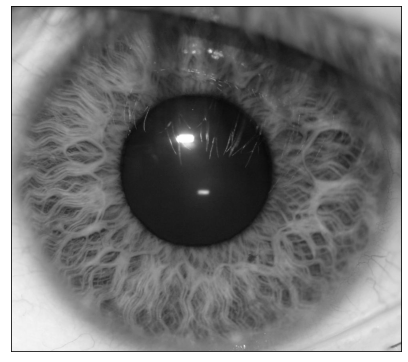

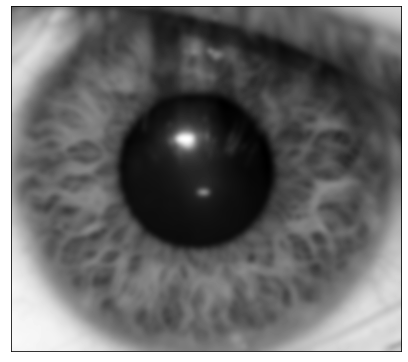

In [60]:
imshow(img)
imshow(gaussian(img, 6))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  This is separate from the ipykernel package so we can avoid doing imports until


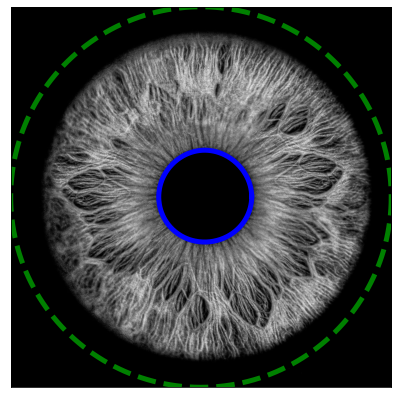

In [66]:
snake = active_contour(gaussian(img, 6),
                       init,
                       alpha=0.015, beta=30, gamma=0.0001)


fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap='gray')
ax.plot(init[:, 0], init[:, 1], '--g', lw=5)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=5)
ax.set_xticks([])
ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

--2021-02-15 23:28:03--  http://www.expertoensiniestros.es/contenido/uploads/2015/07/senales-de-trafico-1140x760.jpg
Resolving www.expertoensiniestros.es (www.expertoensiniestros.es)... 82.98.136.35
Connecting to www.expertoensiniestros.es (www.expertoensiniestros.es)|82.98.136.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218995 (214K) [image/jpeg]
Saving to: ‘senales-de-trafico-1140x760.jpg’

senales-de-trafico- 100%[===================>] 213.86K   512KB/s    in 0.4s    

2021-02-15 23:28:04 (512 KB/s) - ‘senales-de-trafico-1140x760.jpg’ saved [218995/218995]



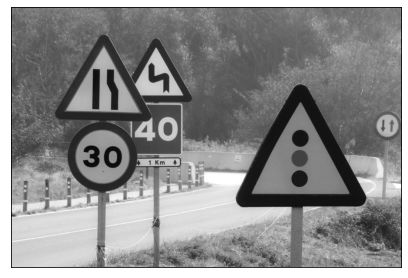

In [70]:
!rm /content/senales-de-trafico-1140x760.jpg
!wget http://www.expertoensiniestros.es/contenido/uploads/2015/07/senales-de-trafico-1140x760.jpg

img = plt.imread('/content/senales-de-trafico-1140x760.jpg')
img = rgb2gray(img)
imshow(img)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: The coordinates used by `active_contour` will change from xy coordinates (transposed from image dimensions) to rc coordinates in scikit-image 0.18. Set `coordinates='rc'` to silence this warning. `coordinates='xy'` will restore the old behavior until 0.18, but will stop working thereafter.
  if __name__ == '__main__':


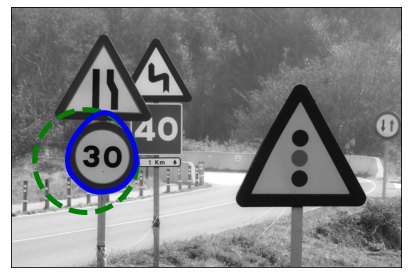

In [76]:
s = np.linspace(0, 2*np.pi, 400)

x = 220 + 150*np.cos(s)
y = 450 + 150*np.sin(s)
init = np.array([x, y]).T

snake = active_contour(gaussian(img, 6),
                       init,
                       alpha=0.015, beta=30, gamma=0.0001)


fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap='gray')
ax.plot(init[:, 0], init[:, 1], '--g', lw=5)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=5)
ax.set_xticks([])
ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

In [73]:
img.shape

(760, 1140)